In [1]:
from logreg import BaseRegressor, LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from utils import loadDataset
from sklearn.model_selection import train_test_split
from importlib import reload

In [2]:
def loadDataset(features=['Penicillin V Potassium 500 MG', 'Computed tomography of chest and abdomen', 
                          'Plain chest X-ray (procedure)',  'Low Density Lipoprotein Cholesterol',
                          'Creatinine', 'AGE_DIAGNOSIS'], split_percent=None, split_state=42):

    """
    Load dataset as X,y numpy arrays - DO NOT CHANGE THIS FUNCTION

    Params:
        features (list): variables to include in model, the full list of potential featurescan be found below
        split_percent (float, None): percentage of dataset to keep as training data, should be between 0-1.0

    Output:
        X (np.ndarray), y (np.array) corresponding to dataset and labels, respectively
        if split_percent is specified, returns X_train, X_test, y_train, y_test

    --------
    >>> Full list of potential features, NSCLC is the class where 1=NSCLC and 0=small cell lung cancer
    >>> Index(['NSCLC', 'GENDER', 'Penicillin V Potassium 250 MG',
       'Penicillin V Potassium 500 MG',
       'Computed tomography of chest and abdomen',
       'Plain chest X-ray (procedure)', 'Diastolic Blood Pressure',
       'Body Mass Index', 'Body Weight', 'Body Height',
       'Systolic Blood Pressure', 'Low Density Lipoprotein Cholesterol',
       'High Density Lipoprotein Cholesterol', 'Triglycerides',
       'Total Cholesterol', 'Documentation of current medications',
       'Fluticasone propionate 0.25 MG/ACTUAT / salmeterol 0.05 MG/ACTUAT [Advair]',
       '24 HR Metformin hydrochloride 500 MG Extended Release Oral Tablet',
       'Carbon Dioxide', 'Hemoglobin A1c/Hemoglobin.total in Blood', 'Glucose',
       'Potassium', 'Sodium', 'Calcium', 'Urea Nitrogen', 'Creatinine',
       'Chloride', 'AGE_DIAGNOSIS'],
      dtype='object')

    """
    # get dataset
    full_df = pd.read_csv("../data/NSCLCdata.csv", index_col="ID")
    
    if "NSCLC" not in features: 
        features.append("NSCLC")
        
    full_df = full_df.loc[:,features]
    
    # split and return appropriate datasets
    X = full_df.loc[:, full_df.columns != 'NSCLC'].values
    y = full_df["NSCLC"].values
    
    if split_percent is not None: 
        return train_test_split(X, y, train_size=split_percent, random_state=42) # X_train, X_test, y_train, y_test

    return X,y


In [3]:
# load data with default settings
X_train, X_val, y_train, y_val = loadDataset(features=['Penicillin V Potassium 500 MG', 
                                                             'Computed tomography of chest and abdomen', 
                                                             'Plain chest X-ray (procedure)',  
                                                             'Low Density Lipoprotein Cholesterol',
                                                             'Creatinine', 'AGE_DIAGNOSIS'], 
                                                   split_percent=0.8, split_state=42)

In [29]:
X_train.shape
log_model.W.shape

X = X_train
if X.shape[1] == log_model.num_feats:
    X = np.hstack([X, np.ones((X.shape[0], 1))])

X.dot(log_model.W)

array([ 1.19570977, -0.13291824,  0.85796071, ..., -0.29129148,
        3.17885032,  0.07085117])

In [4]:
# scale data since values vary across features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform (X_val)

In [14]:
log_model = LogisticRegression(num_feats=6, max_iter=1000, tol=0.0001, learning_rate=0.05, batch_size=12)

In [15]:
log_model.train_model(X_train, y_train, X_val, y_val)

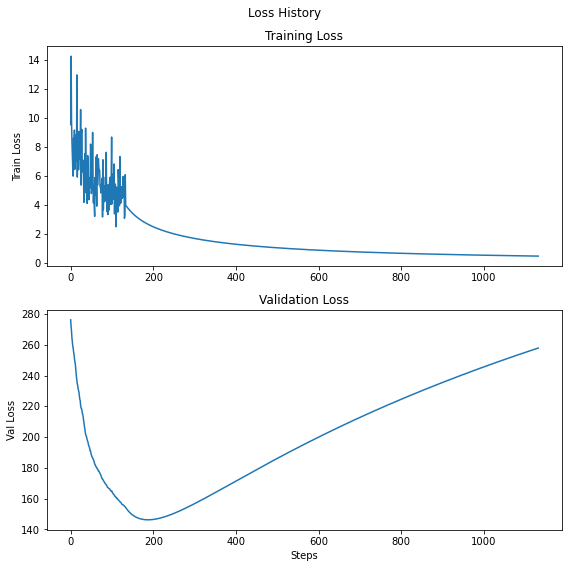

In [16]:
log_model.plot_loss_history()